L/(1 + exp(-k*(x - x_0)))

1.00079203409226/(1 + 1.00176105455958*exp(-0.997852274563045*x))

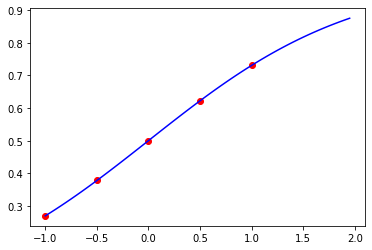

In [81]:
import numpy as np
from sympy import *
from scipy.optimize import curve_fit
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt

x = Symbol("x")
xs = [0, -1, 1, .5, -.5]
ys = [.5, .269, .731, .622, .378]

L,k,x0,x = symbols('L k x_0 x')
f = L/(1+(exp(-k*(x-x0))))
display(f)

syms = list(f.free_symbols)
syms.remove(x)
syms.insert(0,x)
py_f = lambdify(syms,f)

popt, pcov = curve_fit(py_f, xs, ys, maxfev = 4 * (10**5))

syms.pop(0)
subs_arg = dict(list(zip(syms, popt)))

f1 = f.subs(subs_arg)
display(f1)

f2 = lambdify([x],f1)

# plot input data points
plt.scatter(np.array(xs),np.array(ys),color="red")

# plot fitted function
xp = np.arange(min(xs), max(xs)+1, 0.05)
yp = f2(xp)
plt.plot(xp,yp,color="blue")
plt.show()

In [16]:
from sympy import *
from sympy.polys.specialpolys import interpolating_poly
from sympy.polys.polyfuncs import interpolate

x = Symbol("x")
xs = [0, -1, 1, .5, -.5]
ys = [.5, .269, .731, .622, .378]

xs = [QQ.convert(i) for i in xs]
ys = [QQ.convert(i) for i in ys]

p1 = expand(interpolating_poly(len(xs),x,X=xs,Y=ys)).as_poly()
display(p1)

p2 = interpolate( [(xs[i],ys[i]) for i in range(len(xs))], x).as_poly()
display(p2)



Poly(-13/750*x**3 + 149/600*x + 1/2, x, domain='QQ')

Poly(-13/750*x**3 + 149/600*x + 1/2, x, domain='QQ')